In [1]:
import numpy as np

d=1
Nr = 10
theta = np.pi/2
## Steering vector
s = [np.exp(-2j*np.pi*d*np.arange(Nr)*np.sin(theta))]

s

[array([1.+0.00000000e+00j, 1.+2.44929360e-16j, 1.+4.89858720e-16j,
        1.+7.34788079e-16j, 1.+9.79717439e-16j, 1.+1.22464680e-15j,
        1.+1.46957616e-15j, 1.+1.71450552e-15j, 1.+1.95943488e-15j,
        1.+2.20436424e-15j])]

In [12]:
f = [np.arange(5)]
f

[array([0, 1, 2, 3, 4])]

In [ ]:
##Received Signal
import numpy as np
import matplotlib.pyplot as plt

sample_rate = 1e6
N = 10000 # number of samples to simulate

#Create a tone to act as the transmitter signal
t = np.arange(N)/sample_rate #time vector
f_tone = 0.02e6
tx = np.exp(2j*np.pi*f_tone*t)

In [3]:
d = 0.5 #half wavelength spacing
Nr = 3
theta_degrees  = 20 # direction of arrival
theta = theta_degrees / 180 *np.pi #radians conversion
s = np.exp(-2j*np.pi * d * np.arange(Nr)*np.sin(theta)) # Steering vector
print(s) # 3D element long

[ 1.        +0.j          0.47618256-0.87934645j -0.54650034-0.83745888j]


In [4]:
#Making s a column vector
s = s.reshape(-1,1)
print(s.shape) #3x1

#Making TX a row vector
tx = tx.reshape(1,-1)
print(tx.shape)

#Simulate the received signal X through a matrix multiply
X = s@ tx
print(X.shape) #3 x 10000 X is now going to be a 2D array, 1D is time and 1D is the spatial dimension

(3, 1)
(1, 10000)
(3, 10000)


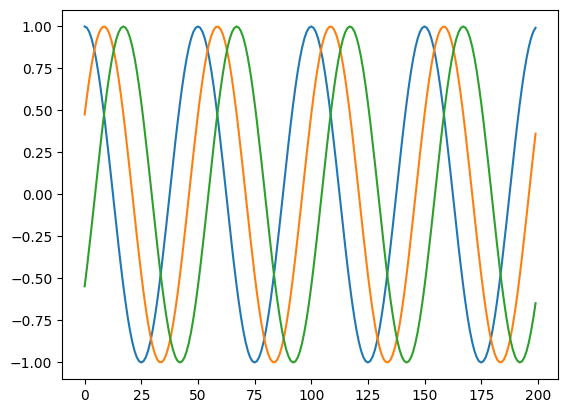

In [5]:
plt.plot(np.asarray(X[0,:]).squeeze().real[0:200]) #the asarray and squeeze are just annoyances we have to do because we came from a matrix
plt.plot(np.asarray(X[1,:]).squeeze().real[0:200])
plt.plot(np.asarray(X[2,:]).squeeze().real[0:200])
plt.show()

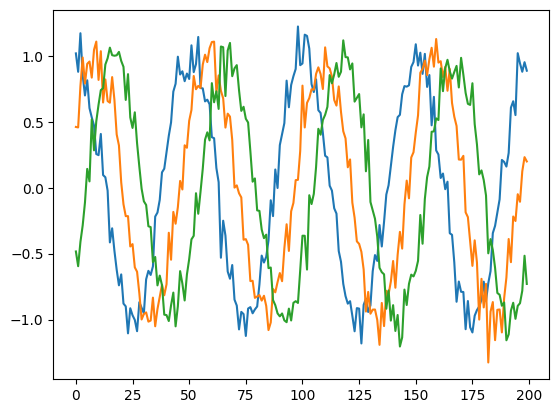

In [6]:
#adding AWGN noise to the measurements

n = np.random.randn(Nr,N) +1j*np.random.randn(Nr,N)
X = X + 0.1*n # X and n are both 3x10000
plt.plot(np.asarray(X[0,:]).squeeze().real[0:200]) #the asarray and squeeze are just annoyances we have to do because we came from a matrix
plt.plot(np.asarray(X[1,:]).squeeze().real[0:200])
plt.plot(np.asarray(X[2,:]).squeeze().real[0:200])
plt.show()

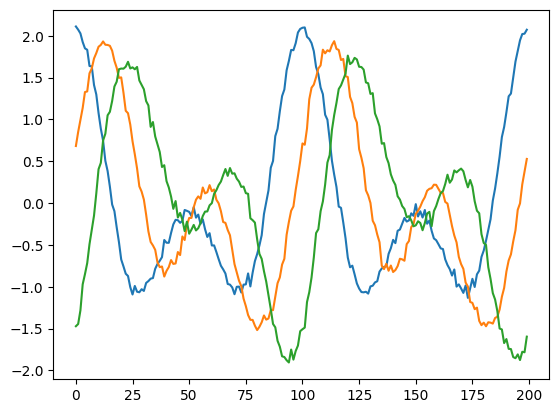

In [15]:
Nr = 8 #8 elements
theta1 = 20 / 180 * np.pi # convert to radians
theta2 = 25 / 180 * np.pi
theta3 = -40 / 180 * np.pi
s1 = np.exp(-2j * np.pi * d * np.arange(Nr) * np.sin(theta1)).reshape(-1,1) #8x1
s2 = np.exp(-2j * np.pi * d * np.arange(Nr) * np.sin(theta2)).reshape(-1,1)
s3 = np.exp(-2j * np.pi * d * np.arange(Nr) * np.sin(theta3)).reshape(-1,1)

#frequencies
tone1 = np.exp(2j*np.pi*0.01e6*t).reshape(1,-1)
tone2 = np.exp(2j*np.pi*0.02e6*t).reshape(1,-1)
tone3 = np.exp(2j*np.pi*0.03e6*t).reshape(1,-1)
X = s1 @ tone1 + s2 @ tone2 + 0.1* s3 @ tone3 #note 1/10th
n = np.random.randn(Nr,N) + 1j*np.random.randn(Nr,N)
X = X+ 0.05*n #8xN

plt.plot(np.asarray(X[0,:]).squeeze().real[0:200]) #the asarray and squeeze are just annoyances we have to do because we came from a matrix
plt.plot(np.asarray(X[1,:]).squeeze().real[0:200])
plt.plot(np.asarray(X[2,:]).squeeze().real[0:200])
plt.show()

In [ ]:
# calculating the weights for each technique of beamforming:

w.conj().T @ X

In [16]:
#conventional, aka, delay-and-sum, beamformer
w = np.exp(-2j*np.pi*d*np.arange(Nr)*np.sin(theta))

#Applying the weights to the received signal (i.e. perform the beamforming)           
X_weighted = w.conj().T @X 

print(X_weighted.shape) # 1x10000

(10000,)


22.52252252252251


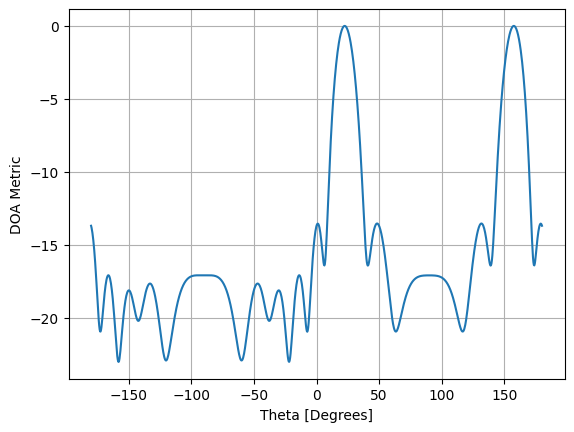

In [17]:
theta_scan = np.linspace(-1*np.pi, np.pi, 1000) # 1000 different thetas between
results = []
for theta_i in theta_scan:
	w = np.exp(-2j * np.pi * d * np.arange(Nr) * np.sin(theta_i)) # Convetional, aka delay-and-sum, beamformer
	X_weighted = w.conj().T @X # apply our weights. remember X is 3x10000
	results.append(10*np.log10(np.var(X_weighted))) # power in signal, in dB so its easier to see small and large lobes at the same time
results -= np.max(results) #normalize (optional)

# print angle that gave us the max value
print(theta_scan[np.argmax(results)]*180/np.pi) #19.99

plt.plot(theta_scan*180/np.pi, results) #lets plot angle in degrees
plt.xlabel("Theta [Degrees]")
plt.ylabel("DOA Metric")
plt.grid()
plt.show()

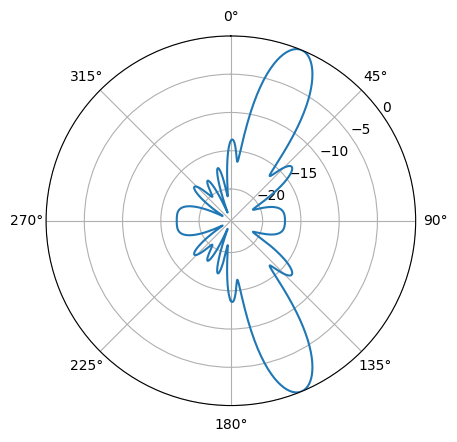

In [18]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta_scan, results) # MAKE SURE TO USE RADIAN FOR POLAR
ax.set_theta_zero_location('N') # make 0 degrees point up
ax.set_theta_direction(-1) # increase clockwise
ax.set_rlabel_position(55)  # Move grid labels away from other labels
plt.show()

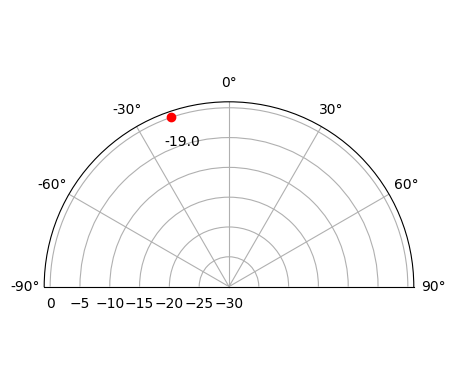

In [12]:
Nr = 3
d = 0.5
N_fft = 512
theta_degrees = 20 #there is no SOI, we arent processing samples, this is just the direction we want to point at
theta = theta_degrees/180 * np.pi
w = np.exp(-2j* np.pi*d*np.arange(Nr) * np.sin(theta))
w = np.conj(w) # or else our answer will be negative/inverted
w_padded = np.concatenate((w,np.zeros(N_fft - Nr))) #zero pad to N_fft elements to get more resolution in the FFT\
w_fft_dB = 10*np.log10(np.abs(np.fft.fftshift(np.fft.fft(w_padded))))**2 # magnitude of fft in dB
w_fft_dB -= np.max(w_fft_dB) #normalize to 0 at peak

#Map the FFT bins to angles in radians
theta_bins = np.arcsin(np.linspace(-1,1,N_fft)) #in radians

#find max so we can add it to plot
theta_max = theta_bins[np.argmax(w_fft_dB)]

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta_bins, w_fft_dB) # MAKE SURE TO USE RADIAN FOR POLAR
ax.plot([theta_max], [np.max(w_fft_dB)],'ro')
ax.text(theta_max - 0.1, np.max(w_fft_dB) - 4, np.round(theta_max * 180 / np.pi))
ax.set_theta_zero_location('N') # make 0 degrees point up
ax.set_theta_direction(-1) # increase clockwise
ax.set_rlabel_position(55)  # Move grid labels away from other labels
ax.set_thetamin(-90) # only show top half
ax.set_thetamax(90)
ax.set_ylim([-30, 1]) # because there's no noise, only go down 30 dB
plt.show()